✅ Dataset Loaded Successfully!
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


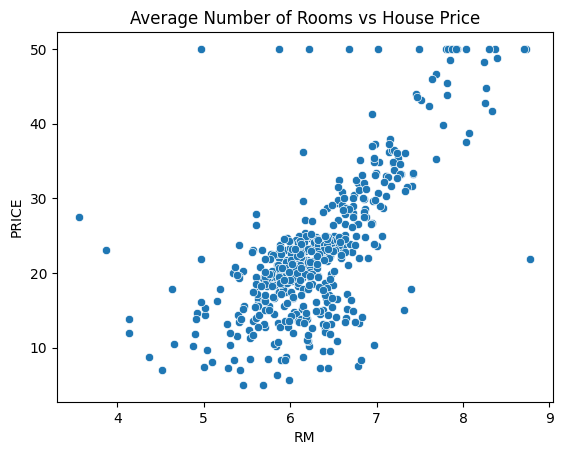

Mean Absolute Error: 3.189091965887848
Mean Squared Error: 24.291119474973513
R² Score: 0.668759493535632


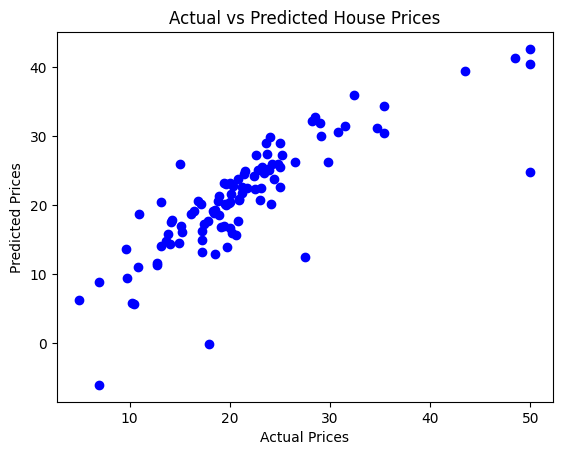

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load the Dataset from OpenML (replaces load_boston)
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame  # converts to pandas DataFrame

# Step 3: Rename Target Column
df.rename(columns={'MEDV': 'PRICE'}, inplace=True)

# Step 4: Display first few rows
print("✅ Dataset Loaded Successfully!")
print(df.head())

# Step 5: Visualize a Feature vs Target
sns.scatterplot(x='RM', y='PRICE', data=df)
plt.title('Average Number of Rooms vs House Price')
plt.show()

# Step 6: Split Data
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train the Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 9: Predict
y_pred = model.predict(X_test_scaled)

# Step 10: Evaluate Model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 11: Visualization - Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()
